In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.4, palette='Set2')

In [45]:
variants_df = pd.read_csv('data/transformed_clades.csv',header=0)
variants_df['total_sequences'] = variants_df.iloc[:,[1,2,3]].sum(axis=1)
for col in list(variants_df):
    if col != 'week' and col != 'total_sequences':
        col_name = 'proportion_' + col
        variants_df[col_name] = variants_df[col] / variants_df['total_sequences']
variants_df.head(20)
variants_df.fillna(0, inplace=True)


In [46]:
tests_df = pd.read_csv('data/percent_positivities.csv', header=0)
percent_positivity = tests_df[['rate(positive_test)', 'week']]

In [47]:
combined_df = variants_df.merge(percent_positivity, on='week')
proportion_variants_cols = [c for c in combined_df.columns.values if 'proportion' in c] 

In [48]:
combined_df.head()

,week,Omicron,recombinant,Delta,total_sequences,proportion_Omicron,proportion_recombinant,proportion_Delta,rate(positive_test)
0,1,4029,2,78,4109,0.980531,0.000487,0.018983,0.275581
1,2,2281,0,19,2300,0.991739,0.000000,0.008261,0.272493
2,3,1821,0,13,1834,0.992912,0.000000,0.007088,0.259926
3,4,919,0,8,927,0.991370,0.000000,0.008630,0.206220
4,5,503,0,1,504,0.998016,0.000000,0.001984,0.137049


In [49]:
positive_variant_frac_df = combined_df[proportion_variants_cols].apply(lambda x: x*combined_df['rate(positive_test)'])
positive_variant_frac_df['week'] = combined_df['week']

In [50]:
week = positive_variant_frac_df['week']
variants_dict = {}
for col in list(positive_variant_frac_df):
    if 'proportion' in col:
        variants_dict[col] = positive_variant_frac_df[col].tolist()

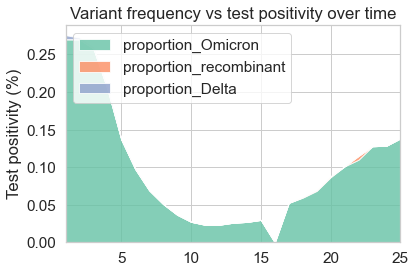

In [51]:
fig, ax = plt.subplots(figsize=(6,4))
## feed in binned dates (weekly) in place of 'year'
ax.stackplot(week, variants_dict.values(),
             labels=variants_dict.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('Variant frequency vs test positivity over time')
ax.set_ylabel('Test positivity (%)')

ax.set_xlim(1, 25)
plt.show()